<b>Тема проекта:</b> Прогнозирование вероятности оттока пользователей для фитнес-центров и разработка мероприятий по удержанию клиентов.


Имеются данные о клиентах фитнес-центра.

<b>Цель</b> — провести анализ данных и подготовить план действий по удержанию клиентов в разрезе сформированных категорий клиентов.  

<b>Задачи:</b>  
•	спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  
•	сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;  
•	проанализировать основные признаки, наиболее сильно влияющие на отток;  
•	сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:   
1) выделить целевые группы клиентов;  
2) предложить меры по снижению оттока;  
3) определить другие особенности взаимодействия с клиентами.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from itertools import combinations
import pylab as pl
import numpy as np

# Проведем исследовательский анализ данных (EDA)

## Изучим данные, проверим на наличие пропусков, дубликатов, корректности формата данных, наименования столбцов. Также изучим средние значения и стандартные отклонения в данных.

In [3]:
def EDA(data):
    display(data.head(5),
          data.info(),
          'Названия колонок:',data.columns,
          'Дубликаты:',data.duplicated().sum(),
          data.describe()
         )

In [4]:
EDA(gym_churn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


None

'Названия колонок:'

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

'Дубликаты:'

0

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
col = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age','Churn']

In [6]:
for i in col:
    display(i,gym_churn[i].unique())

'gender'

array([1, 0], dtype=int64)

'Near_Location'

array([1, 0], dtype=int64)

'Partner'

array([1, 0], dtype=int64)

'Promo_friends'

array([1, 0], dtype=int64)

'Phone'

array([0, 1], dtype=int64)

'Contract_period'

array([ 6, 12,  1], dtype=int64)

'Group_visits'

array([1, 0], dtype=int64)

'Age'

array([29, 31, 28, 33, 26, 34, 32, 30, 23, 27, 35, 25, 36, 24, 21, 37, 22,
       19, 20, 38, 39, 18, 41], dtype=int64)

'Churn'

array([0, 1], dtype=int64)

Формат столбцов соответствует необходимому, пропущенных значений нет.  

Почти половина столбцов имеют только значения 0 и 1, т.е. соответствует клиент определенному признаку(1) или нет(0).  

Если проанализировать средние данные по столбцам, то:  
'Gender': распределение мужчин и женщин примерно одинаковое,  
'Near_location': 84% проживающих или работающих в районе, где находится фитнес-центр,  
'Partner': 49% сотрудники компании-партнёра клуба,   
'Promo_friends': 31% записаны в рамках акции «приведи друга» ,   
'Phone': у 90% указан телефон,    
Ggroup_visits: 41% посещают групповые занятия    
'Churn': 26% отток клиентов в текущем месяце.  
'Contract_period': абонементы бывают сроком от 1, 6, 12 месцев, средний срок -4,6мес, но только 25% приобретают абонементы на срок от 6мес. Похожая картина с со сроком до окончания абонемента.
'Age': возраст клиентов от 18 до 41года, средний -29лет.  
'Lifetime' — время с момента первого обращения в фитнес-центр от 0 до 31мес., среднее -3,7мес. Только 25% посещают клуб более 5мес.  
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента: от 0 до 6 раз, среднее количество - 1,9раз.  
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц: от 0 до 6,1 раз, среднее - 1,76р.  
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: от 0,15 до 553, средняя - 147.') 

Сильного разброса в данных не наблюдается. 

## Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. 

In [7]:
gym_churn_group=gym_churn.groupby('Churn',as_index=False).agg('mean')

In [8]:
gym_churn_group

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Т.к. значения в столбцах:
gender, Near_Location,Partner, Promo_friends, Phone, Group_visits, Churn, 
состоят только из  0 и 1 (соответствует клиент признаку или нет), то их средние значения равняются доле клиентов, соответствующих данному признаку. При умножении на 100% мы получим их долю.

Cредние показатели клиентов, которые ушли, отличаются от показателей пользователей, которые остались, тем, что:
- соотношение по половому признаку, наличию телефона практически одинаковое,
- проживающих рядом на 10% меньше,
- работающих в компаниях-партнерах на 17,9% меньше(35,5% против 53,4% у оставшихся),
- пришедших по акции "приведи друга" на 17% меньше(18,4% против 35,4% у оставшихся),
- средний срок абонемента на 4 месяца меньше (1,7мес.),
- посещающих групповые тренировки на 19,5% меньше (26,9% против 46,4% у оставшихся,
- возраст на 3 г. младше (27 лет против 30лет у оставшихся),
- выручка от других услуг клуба на 43 меньше(115 против 158, т.е. почти на треть меньше),
- срок с начала посещения - до 1 месяца против 4,7мес. у оставшихся,
- частота посещения на 0,5 меньше(1,5 против 2 раз в неделю),
- частота посещения за последний месяц в 2 раза меньше (1р. в неделю).
  

## Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

In [9]:
columns = gym_churn_group.drop(['Churn'], axis=1).columns

Разделим признаки на категориальные и количественные.

In [10]:
categorical = gym_churn.loc[:,['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone','Group_visits','Churn']]
categorical.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Churn
0,1,1,1,1,0,1,0
1,0,1,0,0,1,1,0
2,0,1,1,0,1,0,0
3,0,1,1,1,1,1,0
4,1,1,1,1,1,0,0


In [11]:
numerical = gym_churn.loc[:,['Contract_period', 'Age','Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month','Churn']]
numerical.head(5)

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,6,29,14.227470,5.0,3,0.020398,0.000000,0
1,12,31,113.202938,12.0,7,1.922936,1.910244,0
2,1,28,129.448479,1.0,2,1.859098,1.736502,0
3,12,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,26,198.362265,1.0,3,1.113884,1.120078,0


Построим столбчатые диаграммы для категориальных признаков.

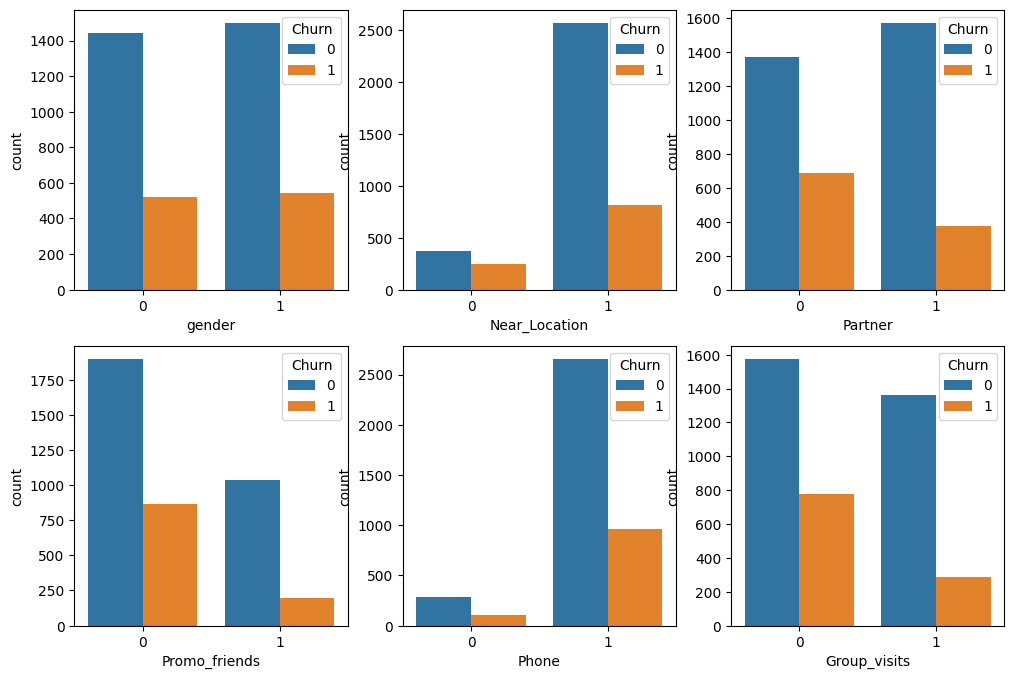

In [32]:
fig, ax =plt.subplots(2,3, figsize=(12, 8))
sns.countplot(x=categorical['gender'],hue="Churn", data=categorical, ax=ax[0,0])
sns.countplot(x=categorical['Near_Location'], hue="Churn", data=categorical, ax=ax[0,1])
sns.countplot(x=categorical['Partner'], hue="Churn", data=categorical, ax=ax[0,2])
sns.countplot(x=categorical['Promo_friends'], hue="Churn", data=categorical, ax=ax[1,0])
sns.countplot(x=categorical['Phone'], hue="Churn", data=categorical, ax=ax[1,1])
sns.countplot(x=categorical['Group_visits'], hue="Churn", data=categorical, ax=ax[1,2]);



Построим гистограммы и распределения количественных признаков.

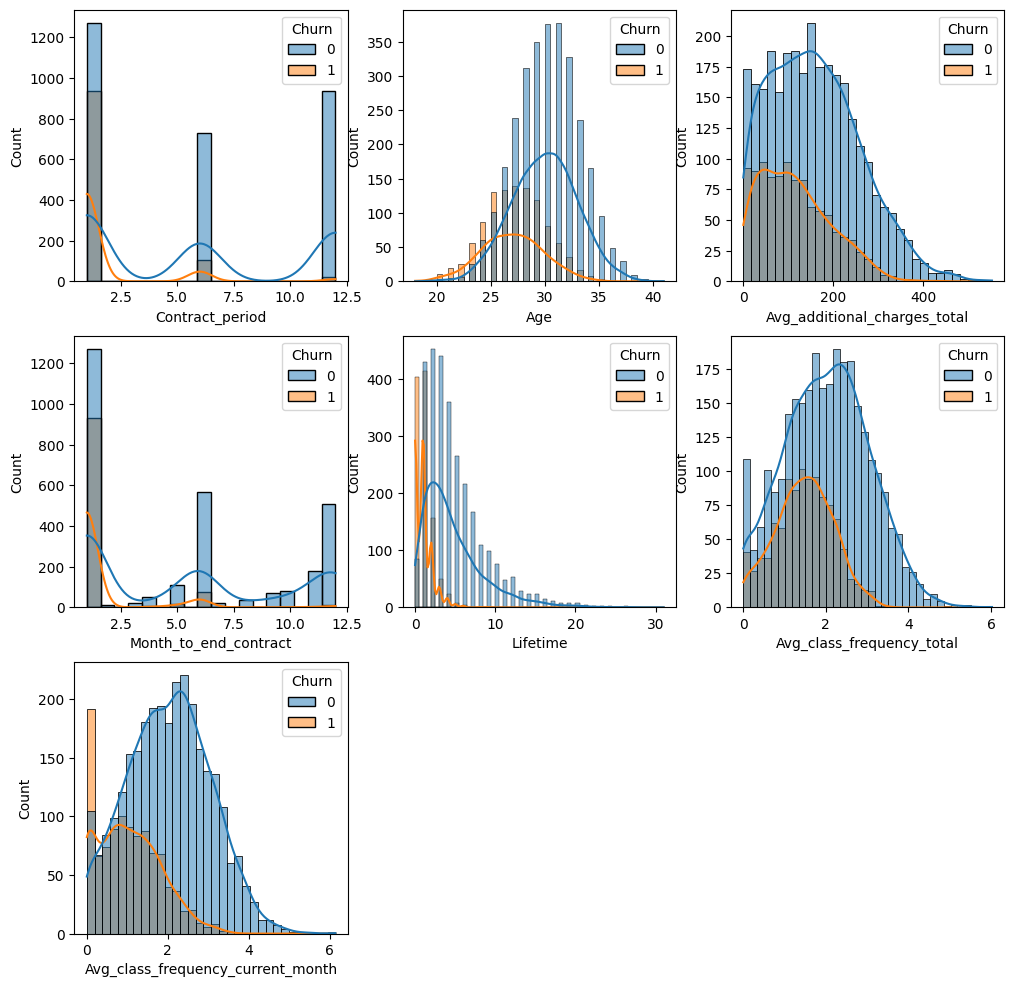

In [13]:
fig, ax =plt.subplots(3,3, figsize=(12, 12))

sns.histplot(data = numerical,x='Contract_period', hue='Churn', kde = True, ax=ax[0,0])
sns.histplot(data = numerical,x='Age', hue='Churn', kde = True, ax=ax[0,1])
sns.histplot(data = numerical,x='Avg_additional_charges_total', hue='Churn', kde = True, ax=ax[0,2])
sns.histplot(data = numerical,x='Month_to_end_contract', hue='Churn', kde = True, ax=ax[1,0])
sns.histplot(data = numerical,x= 'Lifetime', hue='Churn', kde = True, ax=ax[1,1])
sns.histplot(data = numerical,x='Avg_class_frequency_total', hue='Churn', kde = True, ax=ax[1,2])
sns.histplot(data = numerical,x='Avg_class_frequency_current_month', hue='Churn', kde = True, ax=ax[2,0])
fig.delaxes(ax=ax[2,1])
fig.delaxes(ax=ax[2,2])

По гистограммам дополнительно видно, что среди ушедших:  
• Большинство проживало рядом.   
 • Мужчин примерно столько же, сколько женщин.  
 • Большинство не работало в компаниях-партнерах.  
 • Большинство изначально приходило самостоятельно, а не по акции "приведи друга". 
 • Большинство не посещали групповые тренировки.  
 • Большинство приобретало абонемент сроком на 1 месяц  
 • Основная возрастная группа моложе примерно на 4 года (максимальное количество ушедших примерно от 26 до 28 против 30-32 у оставшихся)  
 • Картина по выручке у обоих групп похожа, количество клиентов, совершающих большие траты падает у ушедших примерно начиная с отметки в 120-140, а у оставшихся - 200-220.  
 • Практически всем до конца срока абонемета оставалось менее 1 мес.  
 • У большинства прошло не более 2 мес. с начала первого визита в фитнес-клуб,  
 • Частота посещения в неделю составляе т 1-2 раза(у оставшихся - 1-3 раза).  
 • Частота посещения за последний месяц сводится к 0 или максимум до 1-2 раз в неделю

.

Построим также графики попарного распределения признаков

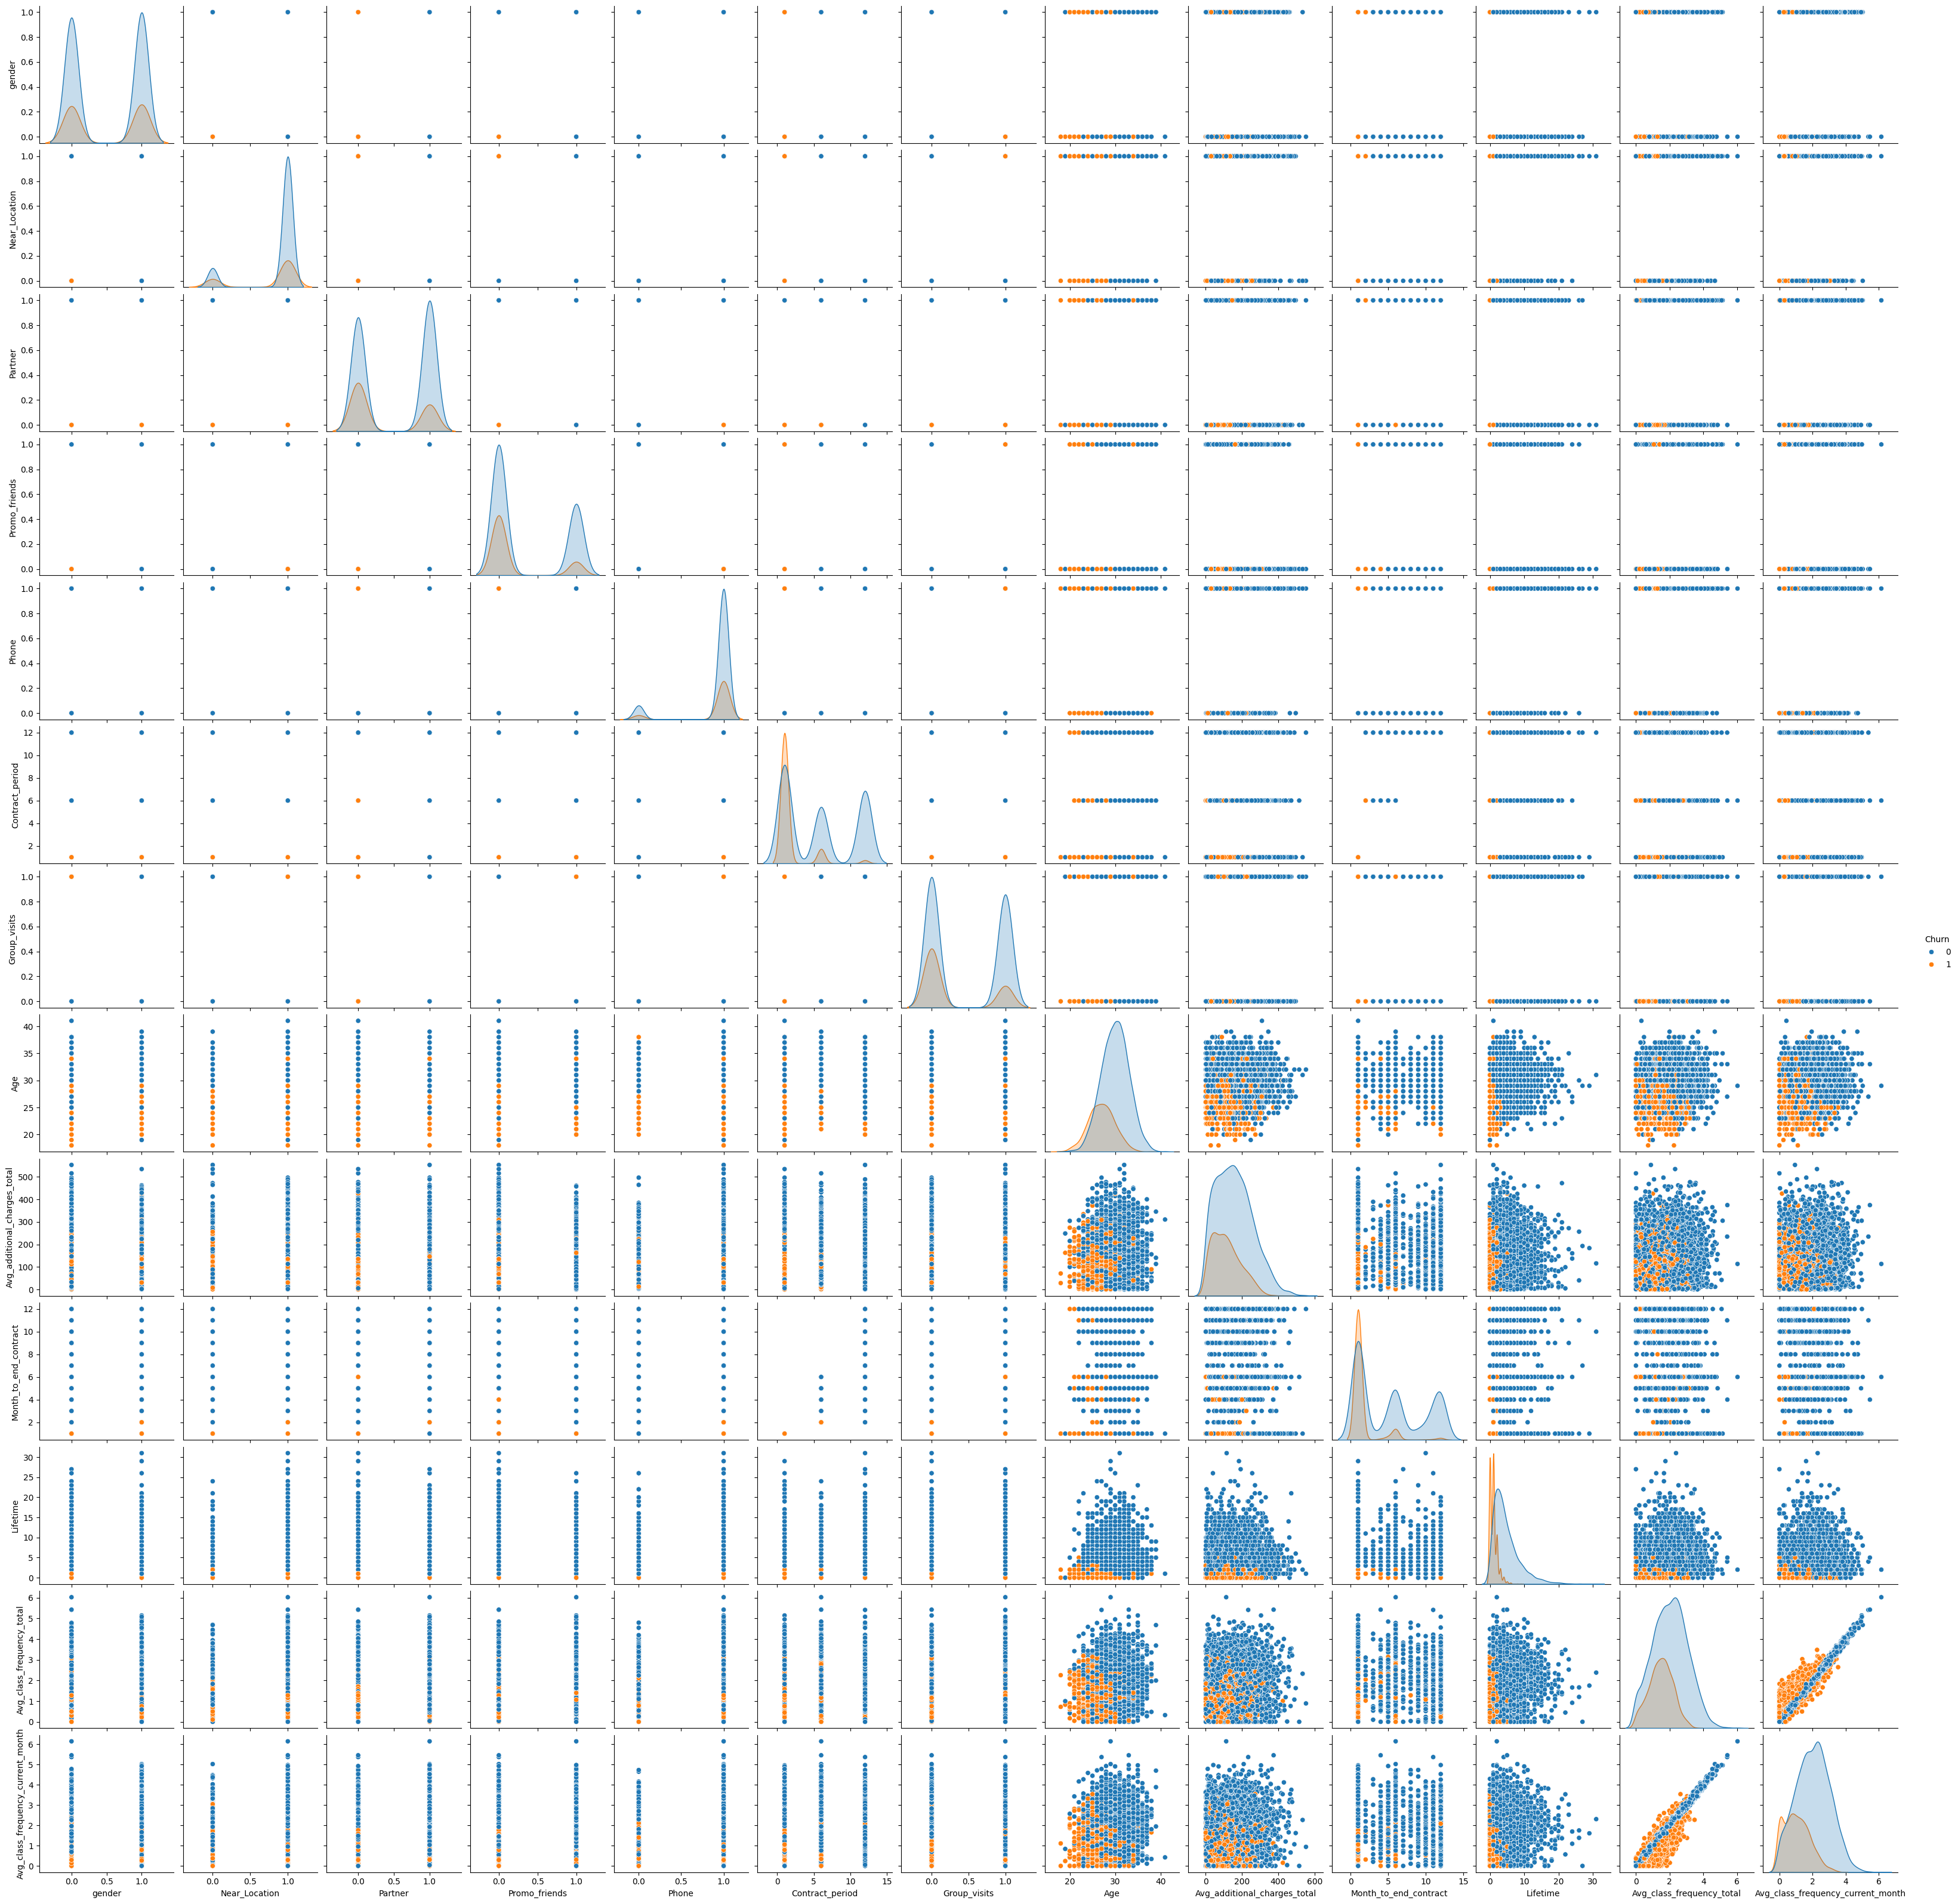

In [14]:
sns.pairplot(gym_churn,hue='Churn') 


Из графиков дополнительно можно отметить несколько закономернорностей:  
Чем старше человек, тем он бросает заниматься при меньшем количестве посещений в неделю, чем более молодые.  
Среди ушедших, чем старше человек, тем меньше он тратил на дополнительные услуги. Чем дольше он ходил, тем реже посещал занятия.  

Также можно отметить, что клиенты пола 1 уходили, если не жили/работали рядом, пришли не по акции"приведи друга", посещали групповые тренировки, уходили за 1 мес.до окончания абонемента, проходив не больше 2 мес  
.
 Люди в возрасте до 25 лет могут перестать ходить даже при 12мес. абонементе, 30 лет - при 6 мес. абонементе, после 30лет бросают единичные клиенты, по которым снижается посещаемость. Т.е., чем старше люди, тем они осознаннее подходят к решениям по покупке абонемента  
 .
 Больше бросают люди, которые приходят не от партнеров и не от друзей. Можно предположить, что клиентам не хватает поддержки со стороны друзей/коллег, также может влиять на посещаемость предлагаемые особые условия по оплате для клиентов компаний-партнеров.

## Построим матрицу корреляций признаков.  

In [15]:
cm = gym_churn.corr() 

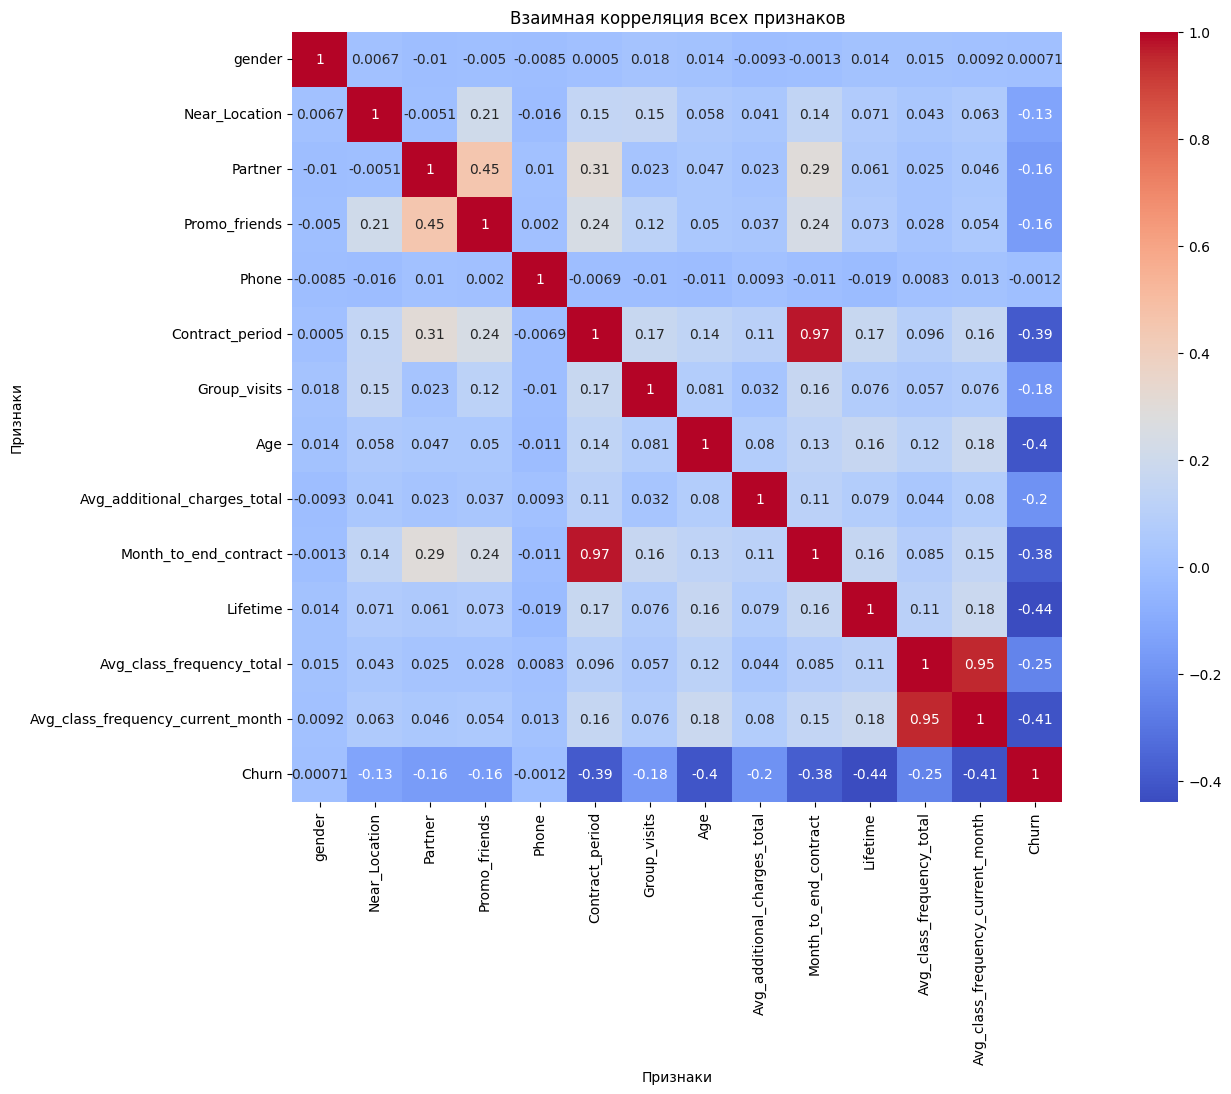

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(cm, annot=True, square=True,cmap='coolwarm').set(title = 'Взаимная корреляция всех признаков', 
         xlabel = 'Признаки', ylabel = 'Признаки');


Из матрицы корреляции видна очень сильная корреляция между 2 парами признаком: 'Contract_period' и 'Month_to_end_contract', 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month'. Эти признаки являются мультиколлинеарными.

Также есть несколько умеренных обратных корреляций между уходом клиента и признаками:'Contract_period', 'Month_to_end_contract', 'Age', 'Lifetime', 'Avg_class_frequency_current_month'.
Т.о., чем моложе клиент, меньше срок абонемента, меньше срок до окончания абонемента, меньше времени клиент занимается с момента первого посещения и/или начинает реже ходить в последний месяц, тем больше вероятность, что он уйдет.

Для дальнейшего построения моделей прогнозирования оттока клиентов следует отметить несбалансированность классов. Количество анализируемых клиентов, которые ушли составляют 26,5% от общего количества(т.е. примерно 1/4 часть), а оставшихся - 73,5%

На основании проведенного исследовательского анализа данных можно сделать следующие выводы:
- Массово (75% всех клиентов) покупаются абонементы на 1 месяц, которые продляются несколько раз, а то и не продляются вовсе, после чего клиент перестает посещать клуб. Примерно 1000 клиентов ушли за прошлый месяц, из них те, кто покупал абонементы на 1 мес. составляют больше 900 чел. 
Можно предположить, что месячные абонементы не так дисциплинируют и подталкивают взвешенно подходить к решению заниматься спортом, как полугодовые и годовые абонементы. 
- Большинство клиентов, которые ушли, проходили в него не более 2 мес. и не чаще 1-2 раз в неделю, а то и не посещали вов В последний месяц количество тренировок сокращалось.се.
- Большинство не посещали групповые трениро
- ки.
Из выше сказанного можно предположить, что клиенты без тренера (в тренажерном зале, на групповых тренировках, бассейне) в виде мотивации и правильно выстроеной с в соответствии с целями программой или поддержки друзей/коллег/материальной выгоды теряют мотивацию к занятиям в течение первых 2 месяцев занятий. Выше перечисленные признаки, кроме групповых тренировок, больше относятся к полу 1.
- Дольше задерживаются те, кто пришел как сотрудник компании-партнера или по акции «Приведи друга». Можно предположить, что поддержка единомышленников или особые коммерческие предложения в рамках этих признаков позволяют удерживать клиентов д  
- Из выше сказанного можно предположить, что клиенты без тренера (в тренажерном зале, на групповых тренировках, бассейне) в виде мотивации и правильно выстроенной  в соответствии с целями программой или поддержки друзей/коллег/материальной выгоды теряют мотивацию к занятиям в течение первых 2 месяцев занятий. Выше перечисленные признаки, кроме групповых тренировок, больше относятся к полу 1.ольше.
- Клиенты, которые больше тратят на дополнительные услуги в клубе, задерживаются дольше. Можно предположить, что им важен сервис оказания различных услуг в одном месте,
- молодые люди готовы чаще заниматься, но быстрее перегорают и бросают занятия спортом. Клиенты до 25-30 лет могут бросить заниматься, даже купив долгосрочные абонементы. Чем старше человек, тем он более дисциплинированно относится к занятиям или оплаченным абонементам, а также возможно у них выше мотивация.


# Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

•	Разбьем данные на обучающую и валидационную выборку функцией train_test_split().  
•	Обучим модель на train-выборке двумя способами:   
-логистической регрессией,  
-случайным лесом.  
•	Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. 

## Логическая регрессия.

In [17]:
X = gym_churn.drop('Churn', axis=1)
y = gym_churn['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

# стандартизируем выборку и оьучаем
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели
model = LogisticRegression(solver='liblinear',random_state=0)
model.fit(X_train_st, y_train)

probabilities = model.predict_proba(X_test_st)[:, 1]

predictions = model.predict(X_test_st)

print('Соотношение классов:\n', gym_churn['Churn'].value_counts())
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Количество строк в y_train по классам: [2351  849]
Количество строк в y_test по классам: [588 212]
Соотношение классов:
 Churn
0    2939
1    1061
Name: count, dtype: int64
Accuracy: 0.94
Precision: 0.90
Recall: 0.85
ROC_AUC: 0.98


При использовании модели Логической регрессии доля правильных ответов(Accuracy) составила 93%. Точность предсказания, что клиент уйдет,(Precision) составила 90%, а доля реально обнаруженных клиентов, среди тех, которые ушли,(Recall) - 85%, что является неплохим показателем. 

Согласно метрике ROC_AUC 98% модель ведет себя достаточно хорошо и нет особой необходимости отдельно настраивать порог отнесения к классу 0 или 1.

## Модель случайного леса

In [18]:
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Accuracy: 0.92
Precision: 0.88
Recall: 0.83
ROC_AUC: 0.98


При использовании модели Случайного леса Accuracy - 92%, Precision - 88%, Recall - 83%. ROC_AUC - 98%.

Показатели модели случайного леса Precision, Recall чуть ниже, чем у  модели Линейной регрессии.   
Но если вспомнить матрицу корреляции, то обнаружена сильная корреляция между 2 парами признаком: 'Contract_period' и 'Month_to_end_contract', 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month', которые являются мультиколлинеарными, поэтому лучше остановиться на модели случайного леса.

Метрика 'Accuracy' не очень подходит для анализа в данном проекте, т.к. данные не сбалансированы, их разбивка 26,5% на 73,5. Лучше оценивать метрики recall и precision.

Метрика precision важнее для кластеров, которые находятся в зоне риска оттока, т.к. если клиент не планирует уходить, то мы потратим на него дополнительный бюджет впустую. Метрика recall важнее для кластеров, которые не находятся в зоне риска оттока и являются лояльными. Если мы пропустим уход этого  клиента, то упустим потенциальный доход, который регулярно приносит данный клиент.  

Если затраты на удержание ниже прибыли, которую мы получаем от удержания клиента, то целесообразнее поднимать метрику recall.

# Сделаем кластеризацию клиентов.

## Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму, чтобы на основании полученного графика предположить, какое количество кластеров можно выделить.

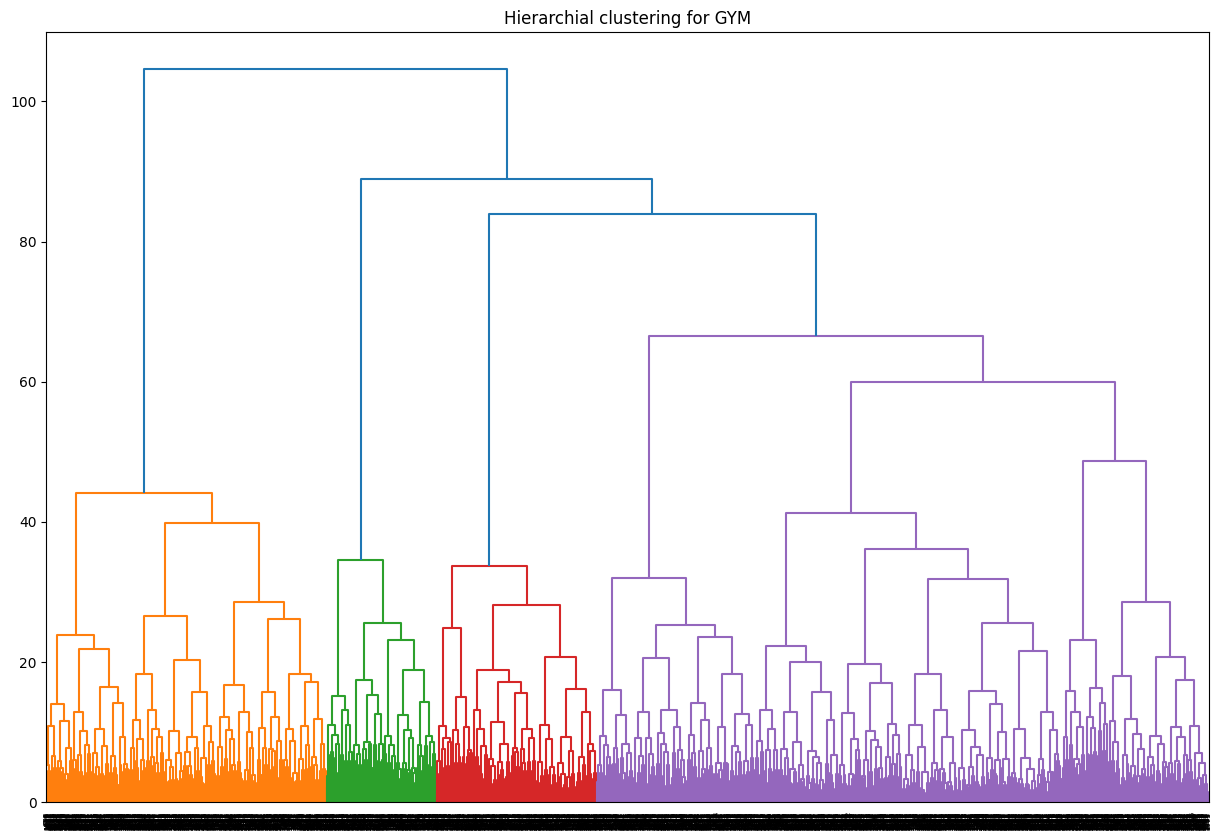

In [19]:
X = gym_churn.drop('Churn', axis=1)
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 


По дендраграмме видны 4 кластера.

## 	Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5. 

In [20]:
X = gym_churn.drop('Churn', axis=1)
sc = StandardScaler()
X_sc = sc.fit_transform(X)
km = KMeans(n_clusters=5, random_state=0) 
labels = km.fit_predict(X_sc) #сохраним присвоенные номера кластеров в данной переменной


C:\Users\Александр и Наталья\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
# определим функцию отрисовки графиков попарных признаков для кластеров

def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(3,3))
    sns.scatterplot(x=df[x_name], y=df[y_name], hue=df[cluster_name], palette='Paired',style=df[cluster_name])
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


In [22]:
#сохраним метки кластера в отдельном столбце датасета
gym_churn['cluster'] = labels

## Посмотритрим на средние значения признаков для кластеров.

In [23]:
cluster_features = gym_churn.groupby('cluster').mean().reset_index()
numeric_columns_clust = cluster_features.drop(columns=['cluster']).columns
cluster_features.style.format({i: '{:.2f}' for i in numeric_columns_clust}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns_clust) \
    .highlight_min(color='coral', subset=numeric_columns_clust)

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.50,0.00,0.47,0.08,0.92,2.23,0.21,28.48,133.86,2.09,2.79,1.66,1.47,0.45
1,1,0.59,0.97,0.26,0.09,0.90,2.81,0.48,30.14,162.01,2.59,5.13,2.88,2.88,0.07
2,2,0.48,1.00,0.82,1.00,0.90,3.16,0.45,29.22,141.20,2.92,3.71,1.73,1.63,0.25
3,3,0.50,0.95,0.74,0.49,0.90,11.87,0.55,29.93,164.76,10.87,4.70,2.00,1.99,0.02
4,4,0.49,1.00,0.24,0.02,0.90,1.99,0.32,28.21,131.19,1.90,2.40,1.27,1.03,0.53


Сформируем также таблицу с медианными значениями количественных признаков.

In [24]:
cluster_features_med = gym_churn.loc[:,['Contract_period', 'Age','Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month','cluster']].groupby('cluster').median().reset_index()
numeric_columns_clust_med = cluster_features_med.drop(columns=['cluster']).columns
cluster_features_med.style.format({i: '{:.2f}' for i in numeric_columns_clust_med}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns_clust_med) \
    .highlight_min(color='coral', subset=numeric_columns_clust_med)

,cluster,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,1.00,29.00,124.32,1.00,2.00,1.60,1.43
1,1,1.00,30.00,147.25,1.00,4.00,2.77,2.79
2,2,1.00,29.00,132.28,1.00,3.00,1.75,1.65
3,3,12.00,30.00,160.80,12.00,4.00,2.05,2.03
4,4,1.00,28.00,118.80,1.00,1.00,1.31,1.07


Сразу можно заметить, что кластеры 0 и 4 попадают в самую большую группу риска ,т.к. у них % ушедших клиентов составляет 44,95% и 52,61%, соответственно.
Клиенты 0 / 4 класса схожи по многим характеристикам: практически не приходят по рекоментадации друзей,покупают абонемент в среднем на 2 месяца, в среднем посещают клуб 2,8 / 2,4мес. с момента 1 прихода, посещают его 1,5 / 1 раз в неделю, посещают групповые тренировки 1 раз из 5/3 посещений, средний возраст составляет 28 лет, они мало тратят на дополнительные услуги.

Основное различие кластеров 0 /4, что 0 живут/работают далеко от фитнесс-цента, 4 все живут/работают рядом с фитнесс-центром. 

In [25]:
count_cluster = gym_churn.groupby('cluster')['gender'].count().reset_index()


In [26]:
count_cluster['share'] = count_cluster['gender'] /len(gym_churn['gender'])

In [27]:
count_cluster

,cluster,gender,share
0,0,545,0.13625
1,1,768,0.19200
2,2,642,0.16050
3,3,937,0.23425
4,4,1108,0.27700


Доля по кластерам, попавшим в самую большую группу риска, составляют: по 0 кластеру - 13,6%, а по 4 - 27,7%. Учитывая, что эти 2 кластера очень схожи, за исключением только признака проживания/работы рядом с клубом, анализ по этим кластерам получился репрезентативным, в общей сложности их доля -41,3%. Но следует в выводах и рекомендациях учитывать, что доля 0 кластера самая наименьшая. 
Самые надежные кластеры 1 и 3 составляют 19,2% и 23,4%, что тоже хороший показатель и рассмотрение их целесообразно. На 2 кластер остается 16%.

## Построим распределения признаков для кластеров. 

Также разобьем признаки на категориальные и количественные для наибольшей информативности графиков.

In [28]:
categorical_cluster = gym_churn.loc[:,['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone','Group_visits','Churn','cluster']]

In [29]:
numerical_cluster = gym_churn.loc[:,['Contract_period', 'Age','Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month','cluster']]

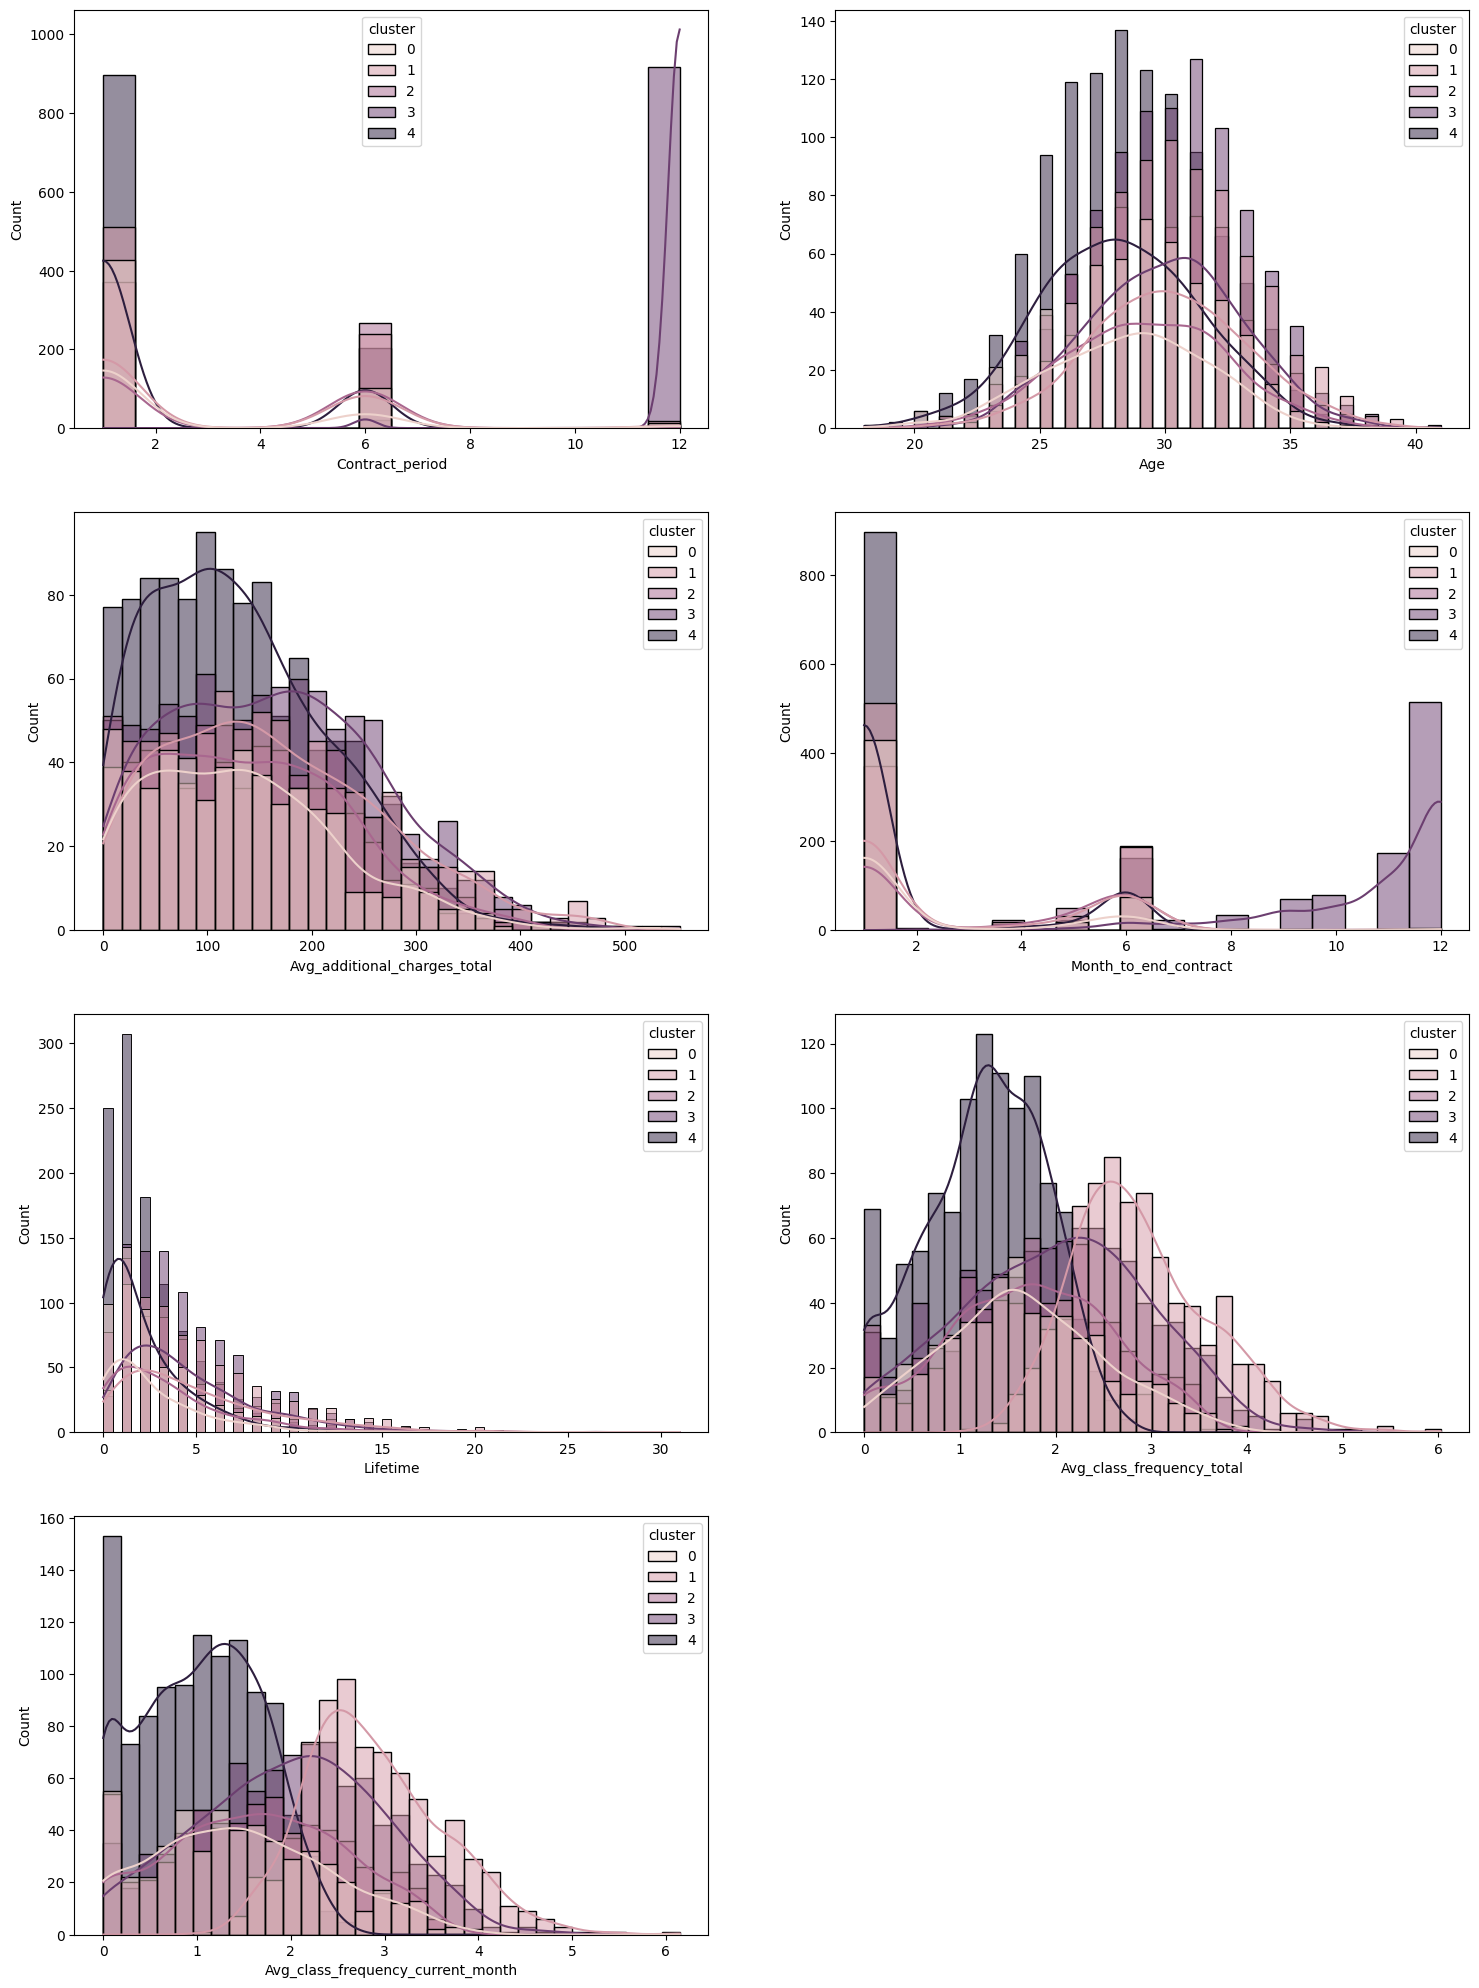

In [34]:
fig, ax =plt.subplots(4,2, figsize=(18, 25))
sns.histplot(data = numerical_cluster,x='Contract_period', hue='cluster', kde = True, ax=ax[0,0])
sns.histplot(data = numerical_cluster,x='Age', hue='cluster', kde = True, ax=ax[0,1])
sns.histplot(data = numerical_cluster,x='Avg_additional_charges_total', hue='cluster', kde = True, ax=ax[1,0])
sns.histplot(data = numerical_cluster,x='Month_to_end_contract', hue='cluster', kde = True, ax=ax[1,1])
sns.histplot(data = numerical_cluster,x= 'Lifetime', hue='cluster', kde = True, ax=ax[2,0])
sns.histplot(data = numerical_cluster,x='Avg_class_frequency_total', hue='cluster', kde = True, ax=ax[2,1])
sns.histplot(data = numerical_cluster,x='Avg_class_frequency_current_month', hue='cluster', kde = True, ax=ax[3,0])
fig.delaxes(ax=ax[3,1]);


## Для каждого полученного кластера посчитаем долю оттока. 

In [31]:
print(gym_churn.groupby('cluster')['Churn'].mean().sort_values(ascending=False))

cluster
4    0.526173
0    0.449541
2    0.247664
1    0.069010
3    0.022412
Name: Churn, dtype: float64


Наибольшая доля оттока у 4 и 0 кластера, 52,61% и 44,95%, соответственно. У 3 кластера - 24,77%. У 1 и 3 кластера отток минимальный - 6,90% и 2,24%

Сформулируем основные признаки кластеров.

Кластеры группы риска на отток.

0 кластер(отток 45%) – «Не местные»:
- живут/работают далеко от фитнес-цента, 
- половина клиентов являются сотрудниками компаний-партнеров,
- практически не приходят по рекомендации друзей, 
- только 1/5 часть клиентов посещает групповые тренировки,
- абонементы большая часть покупает только на 1 месяц, очень редко – на 6 мес.
- средний возраст составляет 28-29 лет, 
- меньше всех кластеров тратят на дополнительные услуги.
- с моменты 1 прихода посещают клуб в основном не более 1-3 мес., 
- посещают клуб  1-2 раз в неделю.
 Можно охарактеризовать, как клиентов, которые решили взять пробный абонемент, но потом из-за отдаленности редко посещали клуб и в итоге перестали в него ходить через 1-3 мес.


4 кластер(отток 53%) – «Начну жизнь с понедельника»:
- все клиенты живут/работают около от фитнес-цента, 
- четверть клиентов являются сотрудниками компаний-партнеров,
- практически все приходят сами, а не по рекомендации друзей, 
- 1/3 часть клиентов посещает групповые тренировки,
- абонементы большая часть покупает только на 1 месяц, очень редко – на 6 мес. 
- средний возраст составляет 28 лет, 
- с момента 1 прихода посещают клуб в основном не более 1 мес., 
- посещают клуб  1-2 раз в неделю, 
- как и 0 кластер меньше всех тратят на дополнительные услуги.
Клиенты, которые живут/работают рядом с клубом и решают, наконец, заняться спортом, загоревшись этой идеей.  Но походив 1 месяц 1-2 раза в неделю, теряют мотивацию и уходят.


Средний кластер по оттоку.

2 кластер (отток 25%) – «Групповики»
- клиентов пола 1 на 20%, чем пола 0 (60%/40%), 
- все клиенты живут/работают около от фитнес-цента, 
- 80% клиентов являются сотрудниками компаний-партнеров,
- все пришли по рекомендации друзей, 
- 1/2часть клиентов посещает групповые тренировки,
- клиенты покупают абонементы на 1 месяц и на 6 мес. На 1 мес. чуть больше. 
- средний возраст составляет 29 лет, 
- с момента 1 прихода посещают клуб в основном 3-4 мес., 
- посещают клуб 1, чаще 2 раза в неделю, 
- тратят на дополнительные услуги больше 0 и 4 кластера, но меньше 1 и 3.
Клиенты, которые люпо рекомендации, бят ходить вместе с кем-то за компанию, разделяя идеологию коллег/друзей, не любят заниматься в одиночку, посещают групповые тренировки. Могут бросить занятия, если не устраивает компания, перестали ходить другие, сменился тренер групповы Пользуются хорошими предложениями по акциям.х программ.
программ.


Самые стабильные кластеры:

1 кластер(отток 7%) – «Самостоятельные»:
- клиентов пола 1 на 20%, чем пола 0 (60%/40%), 
- практически все клиенты живут/работают около от фитнес-цента, 
- 1/4 клиентов являются сотрудниками компаний-партнеров,
- практически все приходят сами, а не по рекомендации друзей, 
- 1/2часть клиентов посещает групповые тренировки,
- примерно 2/3 клиентов покупает абонементы на 1 месяц, 1/3 – на 6 мес. 
- средний возраст составляет 30 лет, 
- с момента 1 прихода посещают клуб в основном 4-5 мес., 
- посещают клуб примерно 3 раза в неделю, 
- тратят на дополнительные услуги на 15-20% больше 0 и 4 кластера.
Клиенты, которые регулярно занимаются спортом, следят за собой или приходят в клуб с определенной целью. Приходят в клуб сами, занимаются 3 раза в неделю, пользуются дополнительными услугами.


3 кластер(отток 2%): «Приверженцы/Выгодное предложение»
- практически все клиенты живут/работают около от фитнес-цента, 
- 3/4 клиентов являются сотрудниками компаний-партнеров,
- 1/2 приходят по рекомендации друзей, 
- 1/2часть клиентов посещает групповые тренировки,
- практически все клиенты приобретают абонементы на 12 мес. 
- средний возраст составляет 30 лет, 
- с момента 1 прихода посещают клуб в основном 4-5 мес., 
- посещают клуб примерно 2 раза в неделю, 
- тратят на дополнительные услуги на 15-30% больше 0 и 4 кластера.
Можно предположить, что это клиенты, которые регулярно занимаются спортом, пользуются дополнительными услугами клуба. Им нравится заниматься в клубе, что побуждает их покупать годовые абонементы. Также возможно это клиенты, которым были предложены выгодные условия на покупку годовых абонементов или продление в рамках акций и партнерских программ, которым удобно посещать клуб и которые ходят туда для поддержания формы 2 раза в неделю или за компанию. 
ластера.


# Выводы и базовые рекомендации по работе с клиентами.



Общую картину клиентов фитнес-клуба можно охарактеризовать следующим образом:  
- распределение мужчин и женщин примерно одинаковое  ,
- 84% проживающих или работающих в районе, где находится фитнес-цент  р,
- половина - сотрудники компании-партнёра клу  ба,
- треть клиентов записаны в рамках акции «приведи друг  а» ,
- 41% посещают групповые за,  нятия
- абонементы бывают сроком от 1, 6, 12 месяцев, только 25% приобретают абонементы на срок от ,  6 мес. 
- возраст клиентов от 18 до 41года, средний ,  -29лет.
-  время с момента первого обращения в фитнес-центр от 0 до 31мес., среднее -3,7мес. Только 25% посещают клуб бол,  ее 5мес.
- средняя частота посещений в неделю за все время с начала действия абонемента: от 0 до 6 раз, среднее количество ,   1,9 раз.
- средняя частота посещений в неделю за предыдущий месяц: от 0 до 6,1раз, средне  е - 1,76р.
- суммарная выручка от других услуг фитнес-центра: от 0,15 до 553, ср,  дняя - 147.  
Отток клиентов за истекший месяц составил 26%, что составляет ¼ от общего количест  клиентов и результатов проводимых мероприятий.торая является более стабильной и менее склонной к прекращению занятий.


Средние показатели клиентов, которые ушли, отличаются от показателей пользователей, которые остались, тем, что:  
- соотношение по половому признаку, наличию телефона практически одинаковое  ,
- проживающих рядом на 10% меньше (76,8% против 87,3%  ),
- работающих в компаниях-партнерах на 17,9% меньше(35,5% против 53,4% у оставшихс  я),
- пришедших по акции "приведи друга" на 17% меньше(18,4% против 35,4% у оставших  ся),
- средний срок абонемента на 4 месяца меньше (1,7м  ес.),
- посещающих групповые тренировки на 19,5% меньше (26,9% против 46,4% у остав  шихся,
- возраст на 3 г. младше (27 лет против 30лет у остав  шихся),
- выручка от других услуг клуба на 43 меньше(115 против 158, т.е. почти на треть   меньше),
- срок с начала посещения - до 1 месяца против 4,7мес. у ос  тавшихся,
- частота посещения на 0,5 меньше (1,5 против 2 раз   в неделю),
- частота посещения за последний месяц в 2 раза меньше (1р.   в неделю).  

Т.о., среди ушедших по сравнению с оставшимися клиентами, больше тех, кто пришел сам, а не по акции «приведи друга», не является сотрудником компании-партнера, приобретают абонементы только на месяц и не продляют их, средний возраст 27лет, ходят на тренировки в основном 1-2р. в неделю, незначительно больше тех, кто живет дальше от дома.
неделю).  


При рассмотрении только категории ушедших, по гистограммам дополнительно видно, что среди ушедших:  
- Большинство проживало рядо  м
- Мужчин примерно столько же, сколько женщ  ин
- Большинство не работало в компаниях-партне  рах
- Большинство изначально приходило самостоятельно, а не по акции "приведи др  уга"
- Большинство приобретало абонемент сроком на 1   месяц
- Большинство не посещали групповые трени  ровки,
- Основная возрастная группа моложе примерно на 1-4 года (примерно от 24 до 31 против 25-34 у оставшихся)
- Картина по выручке у обоих групп похожа, количество клиентов, совершающих большие траты падает начиная с отметки пример  но в 180
- Практически всем до конца срока абонемента оставалось мене  е 1,5мес.
- У большинства прошло не более 2 мес. с начала первого визита в фи  тнес-клуб,
- Частота посещения в неделю составля  ет 1-2 раза
- Частота посещения за последний месяц сводится к 0 или максимум до 1-2 р  аз в неделю.


Из матрицы корреляции дополнительно видно несколько небольших обратных корреляций признаков.   
- Чем старше человек, тем он бросает заниматься при меньшем количестве посещений в неделю, чем более молодые.   
- Среди ушедших чем старше клиенты, тем меньше они тратили на дополнительные услуги. Чем дольше они ходили, тем реже посещали заняти  я.
- Также можно отметить, что клиенты пола 1 уходили, если не жили/работали рядом, пришли не по акции "приведи друга", посещали групповые тренировки, уходили за 1 мес. до окончания абонемента, проходив не больше 2 м  с. 
- Люди в возрасте до 25 лет могут перестать ходить даже при 12мес. абонементе, 30 лет - при 6 мес. абонементе, после 30лет бросают заниматься единичные клиенты, по которым снижается посещаемость. Т.е., чем старше люди, тем они осознаннее подходят к решениям по покупке абонеме  а. – 
- Больше бросают заниматься люди, которые приходят не от партнеров и не от друзей. Можно предположить, что клиентам не хватает поддержки со стороны друзей/коллег, также может влиять на посещаемость предлагаемые особые условия по оплате для клиентов компаний-партн  еров.


Из матрицы корреляции видна очень сильная корреляция между 2 парами признаком: 'Contract_period' и 'Month_to_end_contract', 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month'. Эти признаки являются мультиколлинеарными.  
Также есть несколько умеренных обратных корреляций между уходом клиента и признаками:'Contract_period', 'Month_to_end_contract', 'Age', 'Lifetime', 'Avg_class_frequency_current_month'. Т.о., чем моложе клиент, меньше срок абонемента, меньше срок до окончания абонемента, меньше времени клиент занимается с момента первого посещения и/или начинает реже ходить в последний месяц, тем больше вероятность, что он уйдет.


Для построения моделей прогнозирования оттока клиентов была учтена несбалансированность классов. Количество анализируемых клиентов, которые ушли составляют 26,5% от общего количества(т.е. примерно 1/4 часть), а оставшихся - 73,5%.

Были построены модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце методом Логической регрессии и Случайного леса.  

Показатели модели случайного леса Precision, Recall чуть ниже, чем у модели Линейной регрессии.
Но если вспомнить матрицу корреляции, то обнаружена сильная корреляция между 2 парами признаком: 'Contract_period' и 'Month_to_end_contract', 'Avg_class_frequency_total' и 'Avg_class_frequency_current_month', которые являются мультиколлинеарными, поэтому лучше остановиться на модели случайного лес  а
.
При использовании модели Случайного леса Accuracy - 92%, Precision - 88%, Recall - 83%. ROC_AUC - 98%.
Метрика 'Accuracy' не очень подходит для анализа в данном проекте, т.к. данные не сбалансированы, их разбивка 26,5% на 73,5. Лучше оценивать метрики recall и precis    i
on.
Метрика precision важнее для кластеров, которые находятся в зоне риска оттока, т.к. если клиент не планирует уходить, то мы потратим на него дополнительный бюджет впустую. Метрика recall важнее для кластеров, которые не находятся в зоне риска оттока и являются лояльными. Усли мы пропустим уход этого клиента, то упустим потенциальный доход, который регулярно приносит данный кл  иент.
Если затраты на удержание ниже прибыли, которую мы получаем от удержания клиента, то целесообразнее поднимать метрику recall.



Была сделана кластеризация клиентов.  
Согласно дендрограмме, получилось 4 основных кластера.


Была обучена модель кластеризации на основании алгоритма K-Means и спрогнозированы 5 кластеров клиентов. 
Наибольшая доля оттока у 4 и 0 кластера, 52,61% и 44,95%, соответственно. У 2 кластера - 24,77%. У 1 и 3 кластера отток минимальный - 6,90% и 2,24%.


Кластеры группы риска на отток:

0 кластер(отток 45%) – «Не местные»:
неделю.
 Можно охарактеризовать, как клиентов, которые решили взять пробный абонемент, но потом из-за отдаленности редко посещали клуб и в итоге перестали в него ходить через 1-3 мес.


4 кластер(отток 53%) – «Начну жизнь с понедельника»:
 услуги.
Клиенты, которые живут/работают рядом с клубом и решают, наконец, заняться спортом, загоревшись этой идеей.  Но походив 1 месяц 1-2 раза в неделю, теряют мотивацию и уходят.


Средний класс 
2 кластер (отток 25%) – «Групповики»
Клиенты, которые любят ходить по рекомендации, вместе с кем-то за компанию, разделяя идеологию коллег/друзей, не любят заниматься в одиночку, посещают групповые тренировки. Могут бросить занятия, если не устраивает компания, перестали ходить другие, сменился тренер групповых программ. Пользуются хорошими предложениями по акциям.


Самые стабильные классы:

1 кластер(отток 7%) – «Самостоятельные»:
кластера.
Клиенты, которые регулярно занимаются спортом, следят за собой или приходят в клуб с определенной целью. Приходят в клуб сами, занимаются 3 раза в неделю, пользуются дополнительными услугами.


3 кластер(отток 2%): «Приверженцы/Выгодное предложение»
ластера.
Можно предположить, что это клиенты, которые регулярно занимаются спортом, пользуются дополнительными услугами клуба. Им нравится заниматься в клубе, что побуждает их покупать годовые абонементы. Также возможно это клиенты, которым были предложены выгодные условия на покупку годовых абонементов или продление в рамках акций и партнерских программ, которым удобно посещать клуб и которые ходят туда для поддержания формы 2 раза в неделю или за компанию. 


На основании проведенных исследований можно сделать следующие выводы:  
- Массово (75% всех клиентов) покупаются абонементы на 1 месяц, которые продляются несколько раз, а то и не продляются вовсе, после чего клиент перестает посещать клуб. Примерно 1000 клиентов ушли за прошлый месяц, из них те, кто покупал абонементы на 1 мес. составляют больше 900 чел.   
Можно предположить, что месячные абонементы не так дисциплинируют и подталкивают взвешенно подходить к решению заниматься спортом, как полугодовые и годовые абонементы  . 
- Большинство клиентов, которые ушли, проходили в него не более 2 мес. и не чаще 1-2 раз в неделю, а то и не посещали вов  се.
- Большинство не посещали групповые трениро
  вки.
Из выше сказанного можно предположить, что клиенты без тренера (в тренажерном зале, на групповых тренировках, бассейне) в виде мотивации и правильно выстроенной с в соответствии с целями программой или поддержки друзей/коллег/материальной выгоды теряют мотивацию к занятиям в течение первых 2 месяцев занятий. Выше перечисленные признаки, кроме групповых тренировок, больше относятся к по  
лу 1.
- Дольше задерживаются те, кто пришел как сотрудник компании-партнера или по акции «Приведи друга». Можно предположить, что поддержка единомышленников или особые коммерческие предложения в рамках этих признаков позволяют удерживать клиентов д  ольше.
- Клиенты, которые больше тратят на дополнительные услуги в клубе, задерживаются дольше. Можно предположить, что им важен сервис оказания различных услуг в одном   месте,
- молодые люди готовы чаще заниматься, но быстрее перегорают и бросают занятия спортом. Клиенты до 25-30 лет могут бросить заниматься, даже купив долгосрочные абонементы. Чем старше человек, тем он более дисциплинированно относится к занятиям или оплаченным абонементам, а также возможно у них выше мо  тивация.



Рекомендации:  

- Постепенно отходить от абонементов на 1 месяц. Лучше предлагать бесплатные пробные занятия, а длительность абонементов сделать от 6 мес. Делать скидки и акции на длительные абонементы, которые больше дисциплинируют люде  й.

- В течение первого 1-2 месяцев предлагать клиенту бесплатные/со скидкой занятия с тренерами тренажерного и группового зала, чтобы показать клиентам возможности и разнообразие программ и видов тренировок в зависимости от их целей посещения клуба, чтобы сохранить мотивацию и иметь возможность найти свое направление или трен  ера.

- Продолжать акции «Приведи друга» и сотрудники компаний-парт  неров.

- Сделать больше акцент на целевую категорию в возрасте 30-38 лет, которая является более стабильной и менее склонной к прекращению   занятий.

- Можно использовать модель Случайного леса для предсказания оттока клиентов. Также можно использовать кластеризацию клиентов, для отслеживания изменений групп клиентов и результатов проводимых ме  роприятий.
- Если говорить о кластерах, то необходимо увеличивать долю кластера 1, 3 и следить, чтобы их доля не уменьшалась с помощью метрики recall, предлагая клиентам с риском ухода специальные предложения. 
  Стараться повышать лояльность класса 2, увеличивая их вовлеченность в коллективные процессы. Для них увеличивать метрику precision.
 Снизить процент кластера 0, сосредоточившись на привлечении клиентов, которые живут или работают рядом с клубом, исключив рекламу в других районах.


